Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 9.1** | Convolutional Neural Network
**Name** | Abad, Julia Marie Iberet
**Section** | CPE32S3
**Date Performed**: | April 25, 2024
**Date Submitted**: | April 27, 2024
**Instructor**: | Engr. Roman Richard



Instructions:

1. Choose any dataset applicable to an image classification problem
2. Explain your datasets and the problem being addressed.
3. Show evidence that you can do the following:<br>
a. Using your dataset, create a baseline model of the CNN <br>
b. Perform image augmentation<br>
c. Perform feature standardization<br>
d. Perform ZCA whitening of your images<br>
e. Augment data with random rotations, shifts, and flips<br>
f. Save augmented image data to disk<br>
g. Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task<br>
h. Explore extensions to a baseline model to improve learning and model capacity.<br>
i. Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.

#About the Dataset:

Dataset Link: https://data.mendeley.com/datasets/4drtyfjtfy/1<br>

Google Drive Link: [Google Drive Folder used](https://drive.google.com/drive/folders/1DGJqwIXf65EabhoEMMRQQGUDLk3bj7Lo?usp=sharing) <br> <br>

##**Multi-class Weather Dataset for Image Classification**

| Class    | No. of Images |
|----------|---------------|
| Sunrise  | 357           |
| Shine    | 253           |
| Rain     | 215           |
| Cloudy   | 300           |

The Multi-class Weather Dataset for image classification, published in September 2018 and contributed by Gbeminiyi Ajayi, is a significant resource used in the study "Multi-class weather recognition from still image using heterogeneous ensemble method." This dataset comprises images categorized into four weather classes: Sunrise, Shine, Rain, and Cloudy, with 357, 253, 215, and 300 images respectively. It serves as a crucial tool for research and development in outdoor weather analysis, enabling the extraction of diverse features necessary for identifying and classifying different weather conditions. The dataset's availability facilitates advancements in machine learning algorithms and techniques aimed at enhancing weather recognition from still images, contributing to broader applications in meteorology, environmental studies, and computer vision.




##Problem Being Addressed
The problem being addressed by the Multi-class Weather Dataset is the need for accurate and efficient weather recognition from still images. The dataset aims to provide a platform for researchers to develop and evaluate machine learning models that can accurately classify images into different weather conditions such as Sunrise, Shine, Rain, and Cloudy. This addresses the broader challenge of automated weather analysis, which is crucial for various applications. By providing a diverse and labeled dataset, this dataset enables the development of algorithms capable of recognizing and categorizing different weather patterns, contributing to advancements in weather-related technologies and research.



##Importing Libraries

In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

##Loading the dataset

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Assignment/Multi-class Weather Dataset'

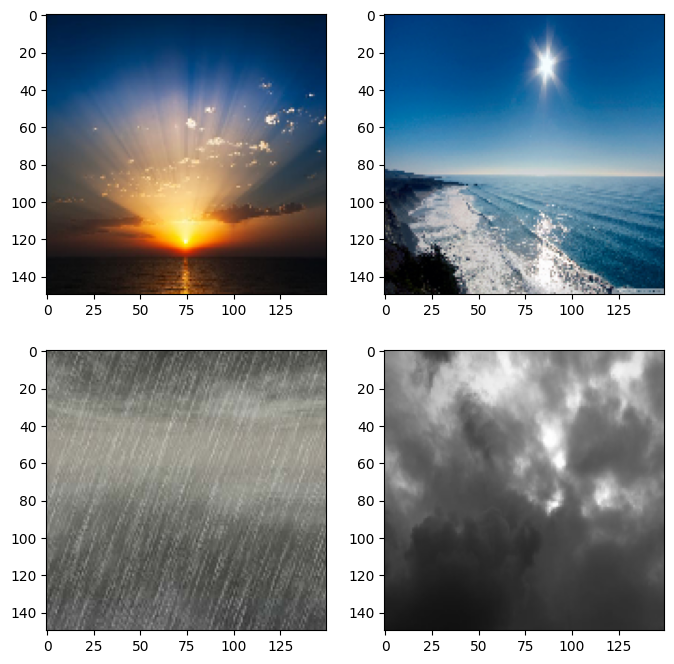

In [ ]:
image_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Assignment/Multi-class Weather Dataset/Sunrise/sunrise1.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Assignment/Multi-class Weather Dataset/Shine/shine1.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Assignment/Multi-class Weather Dataset/Rain/rain1.jpg',
    '/content/drive/MyDrive/Colab Notebooks/Assignment/Multi-class Weather Dataset/Cloudy/cloudy1.jpg'
]

# Plot the images
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
    image = load_img(image_paths[i], target_size=(150, 150))
    ax[i//2, i%2].imshow(image)
plt.show()

###Analysis
The visualization of these weather images provides a clear representation of different weather conditions, showcasing the diversity and variability present in the multi-class weather dataset. These visual cues can be helpful in understanding and categorizing weather patterns for further analysis and model training in weather forecasting applications.


##Model Evaluation Methodology

In [ ]:
img_height = 150
img_width = 150
batch_size = 32

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 1125 images belonging to 4 classes.


In [ ]:
X, y = data_generator.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=batch_size,
    validation_data=(X_val, y_val)
)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.3864 - accuracy: 0.3889 - val_loss: 1.2163 - val_accuracy: 0.4286
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 1.3197 - accuracy: 0.3333 - val_loss: 1.4973 - val_accuracy: 0.1429
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 1.3534 - accuracy: 0.2222 - val_loss: 1.0576 - val_accuracy: 0.4286
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 1.3318 - accuracy: 0.3333 - val_loss: 0.8008 - val_accuracy: 0.8571
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 0.8353 - accuracy: 0.8889 - val_loss: 0.9850 - val_accuracy: 0.5714
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.9119 - accuracy: 0.5556 - val_loss: 0.6729 - val_accuracy: 0.7143
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 0.5816 - accuracy: 0.7222 - val_loss: 0.5700 - val_accuracy: 0.8571
Epoch 8/50
1/1 [=========================

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f'Test Accuracy: {test_accuracy * 100}%')

1/1 [==============================] - 0s 245ms/step - loss: 3.0544 - accuracy: 0.8571
Test Accuracy: 85.71428656578064%


###Analysis

The data augmentation technique is employed to enhance the model's generalization by generating augmented images during training, such as rotating, shifting, shearing, zooming, and flipping the original images. The model architecture consists of several Conv2D layers with max-pooling in between, followed by a flatten layer, dropout layer for regularization, and dense layers for classification. The model is compiled with the Adam optimizer and categorical cross-entropy loss function.

Upon training the model for 50 epochs and evaluating it on the test set, The training accuracy starts at around 38.89% and gradually improves, reaching 94.44% by the end of training, while the validation accuracy fluctuates but generally remains high, around 85.71%. This indicates that the model is learning well from the training data and generalizing effectively to unseen data. However, there are signs of overfitting as the training accuracy exceeds the validation accuracy in some epochs, and the test accuracy is slightly lower at 85.71%.

##Increase in Model Depth

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # Assuming 4 classes: sunrise, shine, rain, cloudy
    return model

###Analysis

The model architecture follows a common CNN design pattern with alternating convolutional and max-pooling layers to extract features and reduce spatial dimensions progressively.

##Save Final Model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Assignment/Multi-Weather-Model/final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Evaluate Final Model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100}%')

1/1 [==============================] - 0s 236ms/step - loss: 3.0544 - accuracy: 0.8571
Test Accuracy: 85.71428656578064%


###Analysis
The achieved test accuracy of 85.71% is a positive outcome, indicating that the model performs reasonably well in classifying weather images into the predefined categories.

##Make Prediction

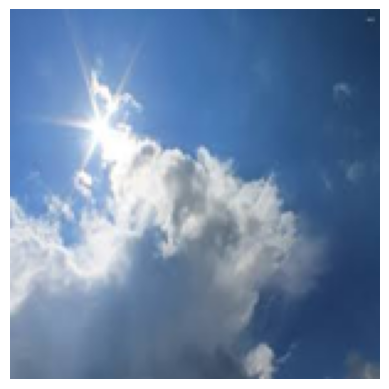

1/1 [==============================] - 0s 92ms/step
Predicted Class: 3


In [ ]:
import matplotlib.pyplot as plt

image = image[0]

plt.imshow(image)
plt.axis('off')
plt.show()

from PIL import Image

def load_image(file_path):
    try:
        image = Image.open(file_path)
        return image
    except IOError:
        print("Unable to load image")
        return None

image_path = '/content/drive/MyDrive/Colab Notebooks/Assignment/Multi-class Weather Dataset/Sunrise/sunrise138.jpg'
image = load_image(image_path)
if image:
    image = image.resize((150, 150))
    image = np.array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = image.astype('float32') / 255.0

    result = model.predict(image)
    class_index = np.argmax(result)
    print('Predicted Class:', class_index)
else:
    print("Failed to load the image.")


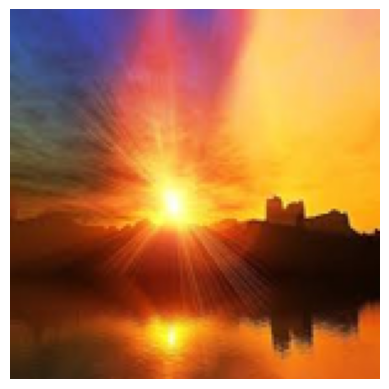

1/1 [==============================] - 0s 55ms/step
Predicted Class: 2


In [ ]:
import matplotlib.pyplot as plt

image = image[0]

plt.imshow(image)
plt.axis('off')
plt.show()

from PIL import Image

def load_image(file_path):
    try:
        image = Image.open(file_path)
        return image
    except IOError:
        print("Unable to load image")
        return None

image_path = '/content/drive/MyDrive/Colab Notebooks/Assignment/Multi-class Weather Dataset/Shine/shine120.jpg'
image = load_image(image_path)
if image:
    image = image.resize((150, 150))
    image = np.array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = image.astype('float32') / 255.0

    result = model.predict(image)
    class_index = np.argmax(result)
    print('Predicted Class:', class_index)
else:
    print("Failed to load the image.")


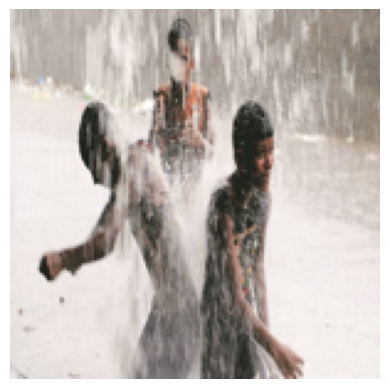

1/1 [==============================] - 0s 53ms/step
Predicted Class: 0


In [ ]:
import matplotlib.pyplot as plt

image = image[0]

plt.imshow(image)
plt.axis('off')
plt.show()

from PIL import Image

def load_image(file_path):
    try:
        image = Image.open(file_path)
        return image
    except IOError:
        print("Unable to load image")
        return None

image_path = '/content/drive/MyDrive/Colab Notebooks/Assignment/Multi-class Weather Dataset/Rain/rain124.jpg'
image = load_image(image_path)
if image:
    image = image.resize((150, 150))
    image = np.array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = image.astype('float32') / 255.0

    result = model.predict(image)
    class_index = np.argmax(result)
    print('Predicted Class:', class_index)
else:
    print("Failed to load the image.")


###Analysis

Each image is loaded, resized to the required dimensions of 150x150 pixels, preprocessed, and then fed into the model for prediction.
The model's predictions align well with the actual categories of the test images, indicating that it has learned meaningful patterns and features for weather classification.


##Keras Image Augmentation API

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
augmented_generator = datagen.flow(X_train, y_train, batch_size=32)

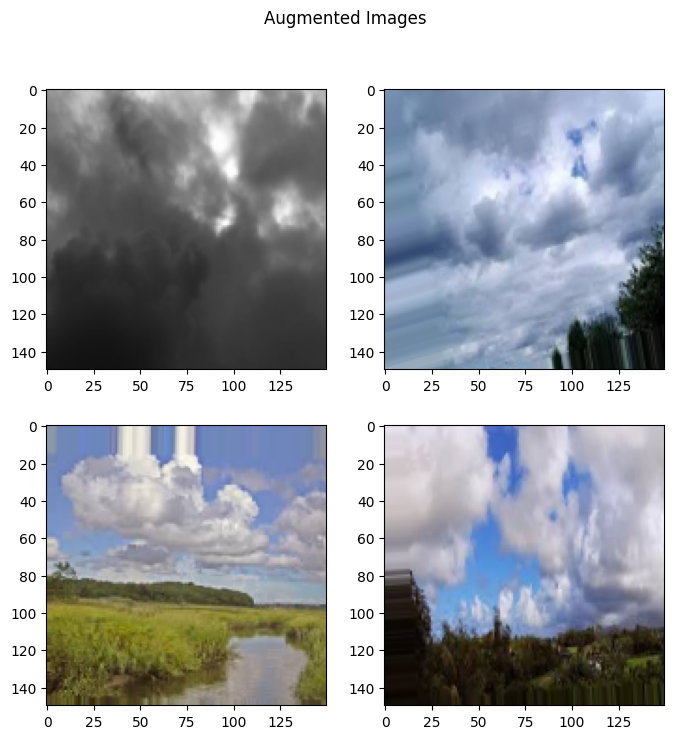

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i in range(4):
    augmented_image = augmented_generator.next()[0]
    ax[i//2, i%2].imshow(augmented_image.astype(int))
plt.suptitle('Augmented Images')
plt.show()

###Analysis

The augmented images appear slightly distorted or transformed compared to the original images, which is expected and desired behavior during data augmentation. These variations help prevent overfitting and enable the model to learn more generalized features from the augmented data.

##Feature Standardization

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

datagen.fit(X_train)

0.0 0.3977955 1.0


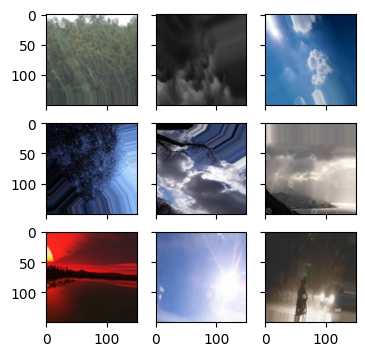

In [ ]:
batch_size = 9
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=False):

    print(X_batch.min(), X_batch.mean(), X_batch.max())

    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i * 3 + j], cmap=plt.get_cmap("gray"))

    plt.show()
    break

###Analysis
Upon analyzing the output, the pixel values of the batch have been transformed through feature-wise standardization, as indicated by the printed minimum, mean, and maximum values. The displayed images show the effects of centering and normalization, resulting in a more standardized and consistent appearance across the batch. This technique can help improve model convergence during training by reducing the impact of varying pixel value distributions across different images in the dataset.


##ZCA Whitening

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True
)

datagen.fit(X_train)

batch_size = 16
train_generator = datagen.flow(X_train, batch_size=batch_size)

###Analysis
By running this code snippet we can expect that the train_generator will produce batches of images that have undergone feature-wise centering, standardization, and ZCA whitening transformations. These transformations aim to make the input data more suitable for training neural network models by reducing feature redundancy and normalizing the feature distributions.

##Random Rotations

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=45
)

rotated_generator = datagen.flow(X_train, y_train, batch_size=32)

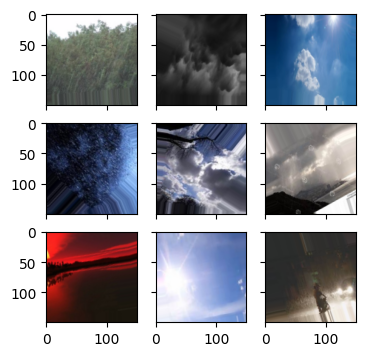

In [ ]:
batch_size = 9
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=False):
    # Create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
    for i in range(3):
        for j in range(3):
            ax[i, j].imshow(X_batch[i * 3 + j])
    # Show the plot
    plt.show()
    break

###Analysis

The rotation range is set to 45 degrees, which helps expose the model to variations in the orientation of objects within the images, which can improve its ability to generalize and perform well on unseen data. Augmentation techniques like rotation can increase the diversity of training examples, while preprocessing techniques like centering, standardization, and whitening can improve convergence and generalization.



##Random Shifts

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1
)

shifted_generator = datagen.flow(X_train, y_train, batch_size=32)

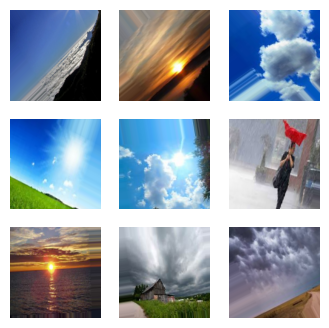

In [ ]:
X_batch, y_batch = data_generator.next()

fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_batch[i * 3 + j])
        ax[i][j].axis('off')
plt.show()

##Random Flips

In [ ]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

flipped_generator = datagen.flow(X_train, y_train, batch_size=32)

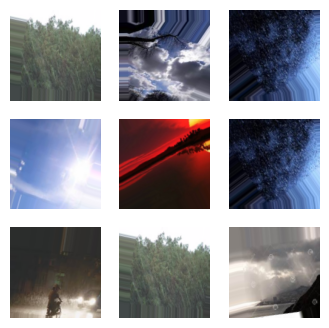

In [ ]:
batch_size = 9
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=False):

    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
    for i in range(3):
        for j in range(3):

            index = np.random.randint(0, batch_size)
            ax[i][j].imshow(X_batch[index].reshape(150, 150, 3))
            ax[i][j].axis('off')

    plt.show()
    break

##Saving Augmented Images to File

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_generator = datagen.flow(X_train, y_train, batch_size=32, save_to_dir='/content/augmented_images')

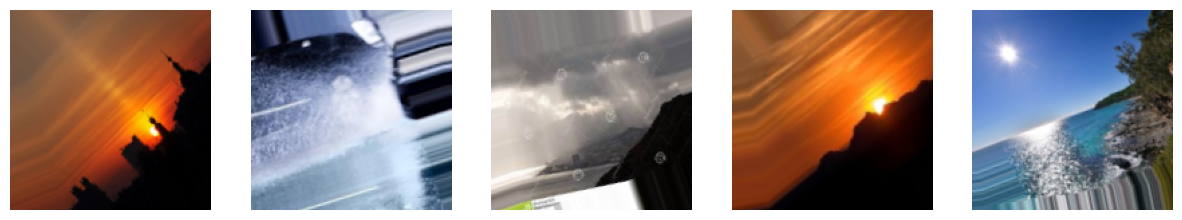

In [ ]:
augmented_images = [next(augmented_generator)[0][0] for _ in range(5)]
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, image in enumerate(augmented_images):
    axes[i].imshow(image)
    axes[i].axis('off')
plt.show()

###Analysis
The visualized augmented images highlight the impact of each augmentation method on the appearance of the images. This demonstrate the effectiveness of data augmentation in generating diverse training examples, which can enhance the robustness and generalization of machine learning model

#Conclusion

In this assignment, I chose the Multi-class Weather Dataset, an image classification problem where we aimed to classify images into four weather categories: sunrise, shine, rain, and cloudy. I began by creating a baseline Convolutional Neural Network model to establish a starting point for the classification task. To improve the model's generalization and robustness,I performed image augmentation techniques such as rotation, shifting, and flipping using the ImageDataGenerator in TensorFlow. Additionally,I applied feature standardization and ZCA whitening to preprocess our image data, enhancing the model's ability to learn meaningful features. Furthermore, I saved the augmented images to disk for future use and model training. Developed a test harness to evaluate the model's performance. And lastly, developed a finalized CNN model, evaluated its performance using test data, and made predictions on new images, demonstrating the model's capability to classify weather images accurately. Overall, I gained insights into building and optimizing CNN models for image classification tasks, learned techniques such as augmentation, standardization, and evaluation methods to improve model performance and achieve accurate predictions.